# Car Insurance Claims

What is the target? (You are required to complete a classification task for this project)
OUTCOME, i.e. has the person filed a claim or not

What does one row represent? (A person? A business? An event? A product?)
One person (first column is Unique ID)

How many features does the data have?
19, including target

How many rows are in the dataset?
10,000

What opportunities exist for dimensionality reduction or feature selection with this dataset?

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

Explore/clean the data

Create exploratory visualizations to understand your data and search for trends.

Choose a model

Preprocess data

Fit and evaluate a default model

Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)

Add your observations in a Markdown: Do these features make sense based on the business case?

Create Explanatory Visualizations for the most important features.

- Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.
  
    - The purpose is to demonstrate key trends you found that will be of interest to a stakeholder.
      
        - These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

        - These will be added to your readme in part 4

## Explore and Clean the Data

### Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')

### Declare Functions

In [2]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()

In [3]:
# load data
df = pd.read_csv('Data/Car_Insurance_Claim.csv')

# preview data
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [4]:
# view number of rows and columns
df.shape

(10000, 19)

In [5]:
# check for duplicate values
df.duplicated().sum()

0

In [6]:
# check for missing values
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [7]:
# drop unnecessary columns
df = df.drop(columns=['ID'])

In [ ]:
# rename columns


In [8]:
# verify change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [9]:
# check categorical data for cardinality
df.select_dtypes('object').nunique()

AGE                   4
GENDER                2
RACE                  2
DRIVING_EXPERIENCE    4
EDUCATION             3
INCOME                4
VEHICLE_YEAR          2
VEHICLE_TYPE          2
dtype: int64

In [10]:
# check consistency of numerical data
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## Create exploratory visualizations to understand your data and search for trends

In [11]:
summarize_df(df)

,Column,dtype,# null,null (%),nunique,min,max
0,AGE,object,0,0.00,4,16-25,65+
1,GENDER,object,0,0.00,2,female,male
2,RACE,object,0,0.00,2,majority,minority
3,DRIVING_EXPERIENCE,object,0,0.00,4,0-9y,30y+
4,EDUCATION,object,0,0.00,3,high school,university
5,INCOME,object,0,0.00,4,middle class,working class
6,CREDIT_SCORE,float64,982,9.82,9018,0.053358,0.960819
7,VEHICLE_OWNERSHIP,int64,0,0.00,2,0,1
8,VEHICLE_YEAR,object,0,0.00,2,after 2015,before 2015
9,MARRIED,int64,0,0.00,2,0,1


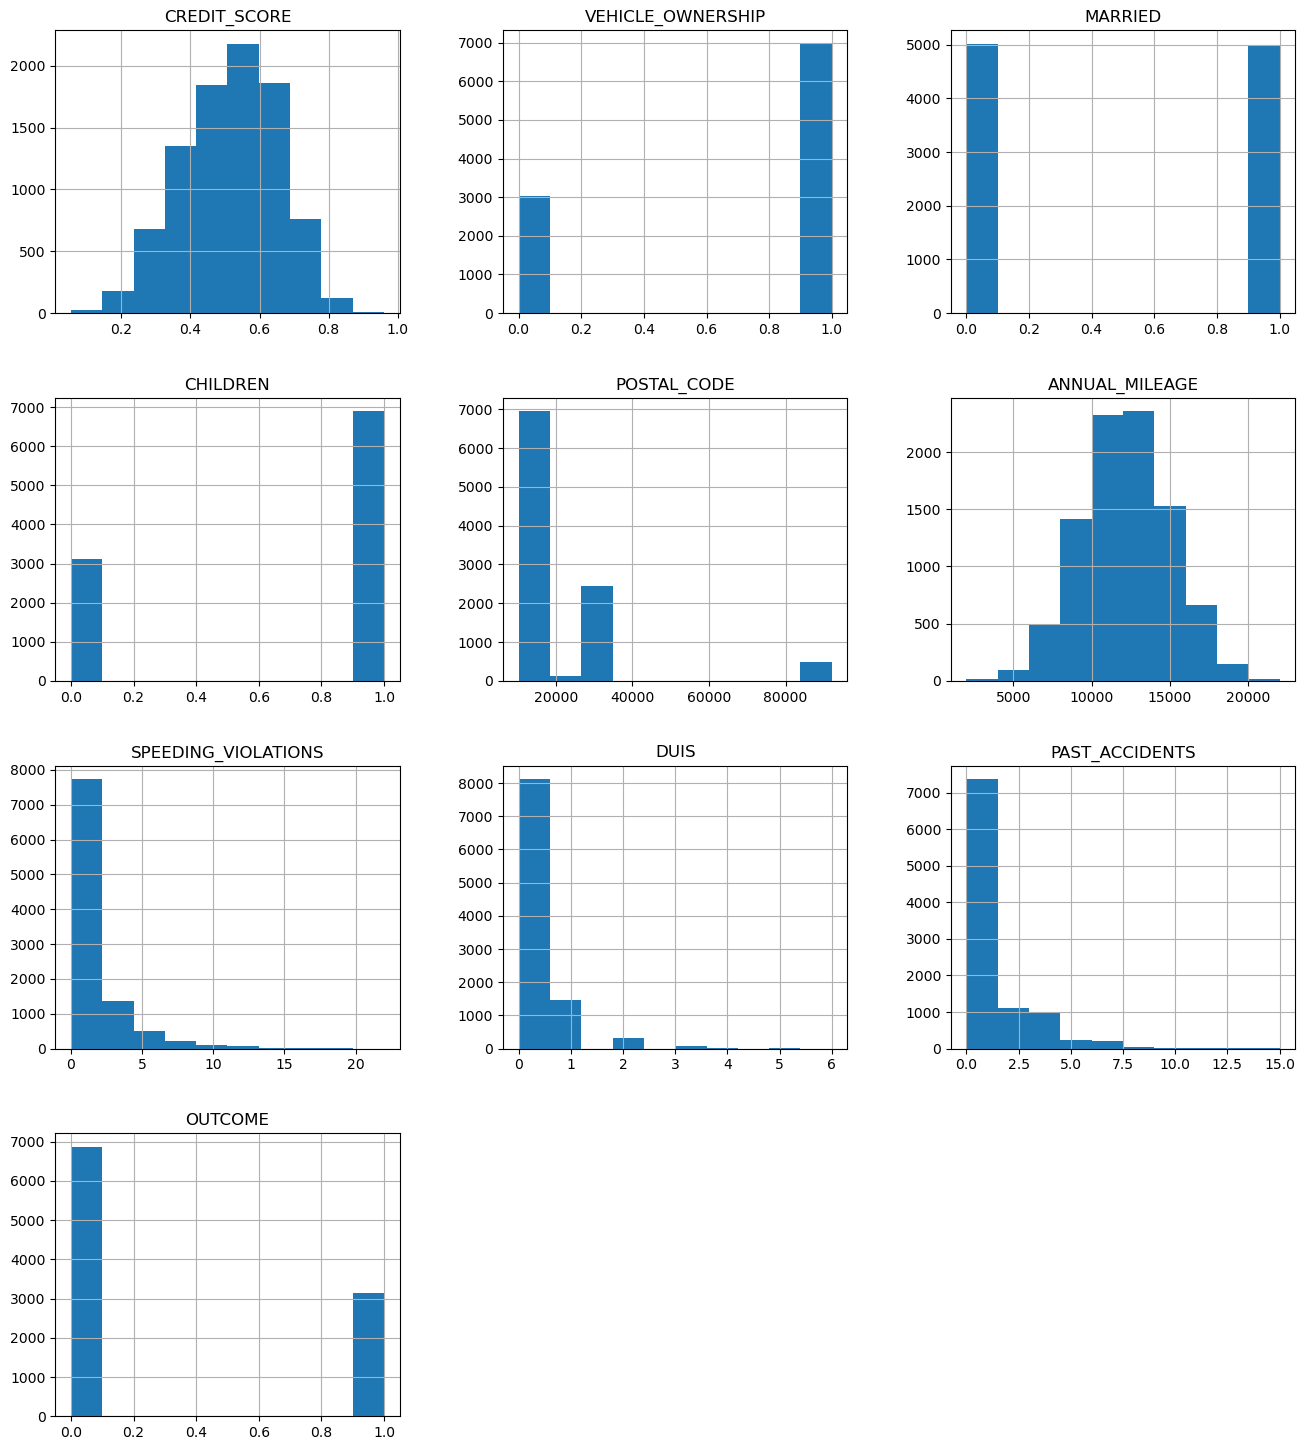

In [12]:
df.hist(figsize=(16,18));

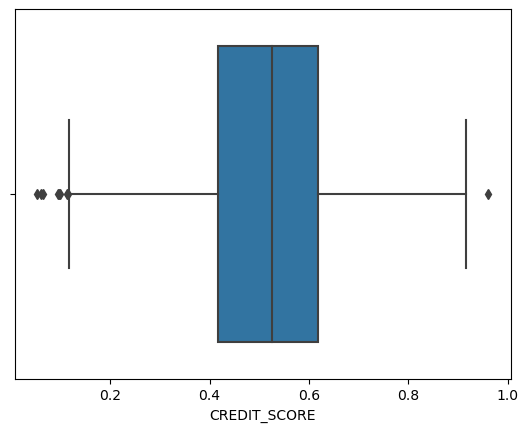

In [13]:
ax = sns.boxplot(data=df, x="CREDIT_SCORE")

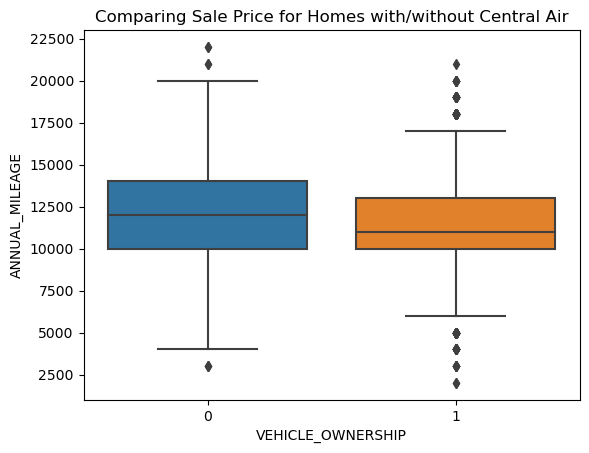

In [14]:
# Horizontal grouped boxplot in seaborn
ax = sns.boxplot(data=df, x='VEHICLE_OWNERSHIP', y="ANNUAL_MILEAGE")
ax.set_title("Comparing Sale Price for Homes with/without Central Air");

In [15]:
# Using select dtypes to get names of categorical columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

AGE count plot 



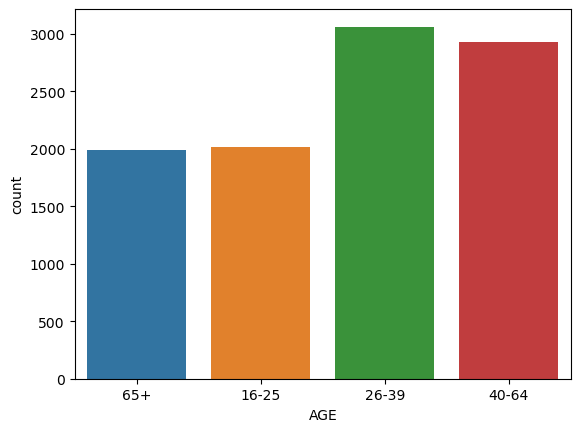

GENDER count plot 



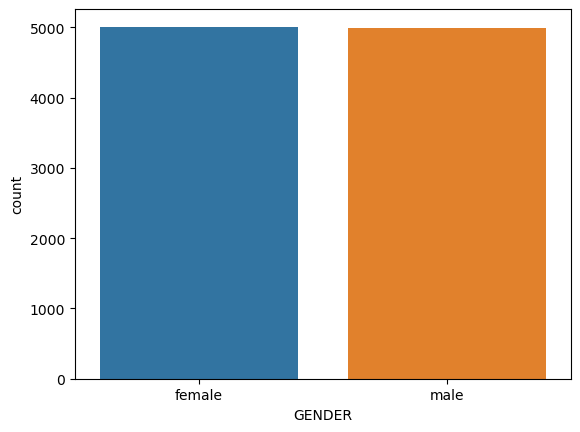

RACE count plot 



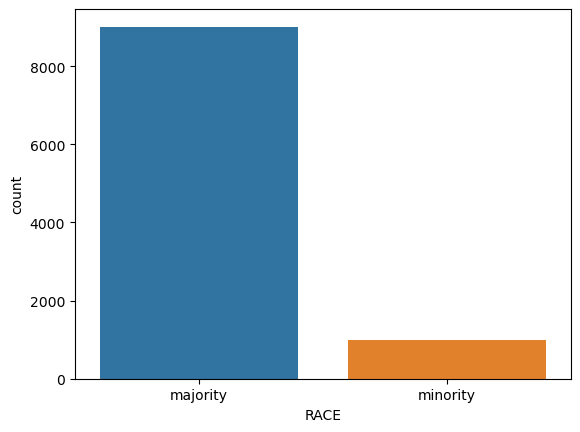

DRIVING_EXPERIENCE count plot 



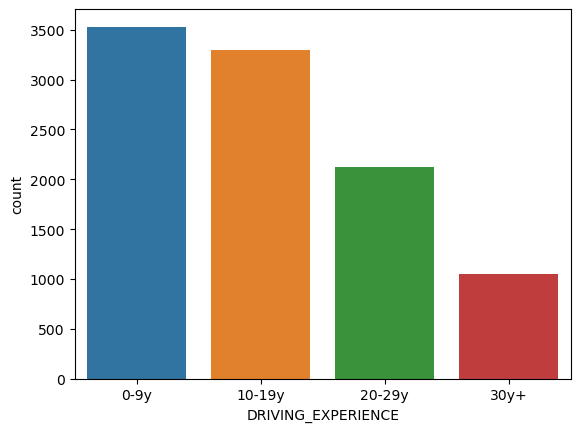

EDUCATION count plot 



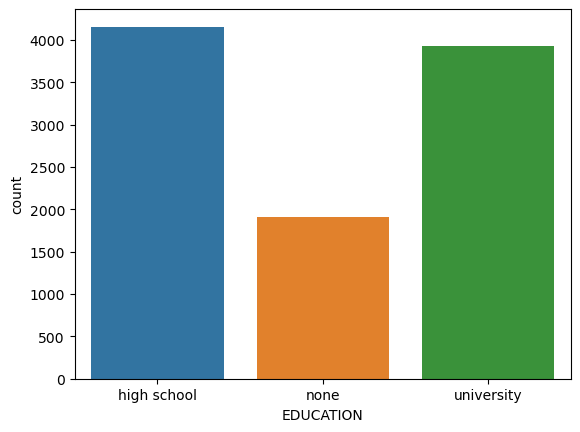

INCOME count plot 



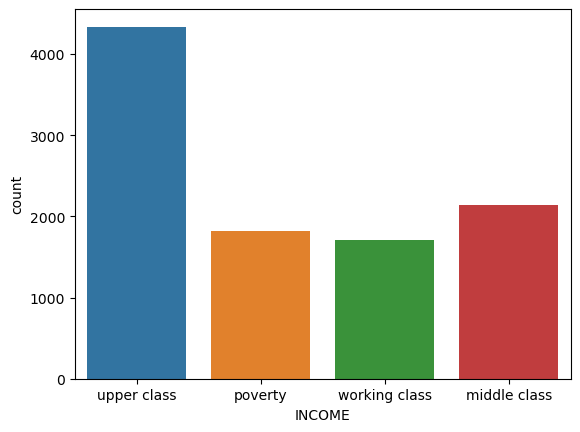

VEHICLE_YEAR count plot 



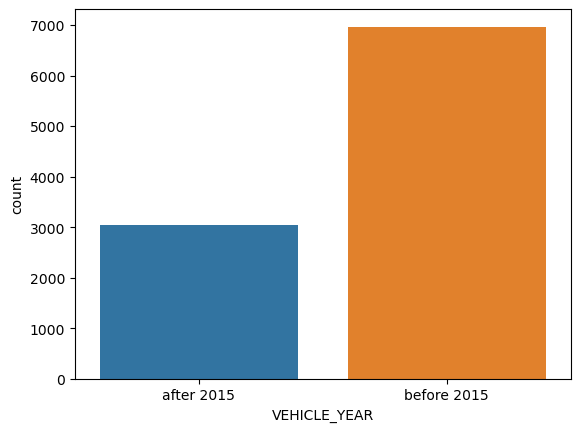

VEHICLE_TYPE count plot 



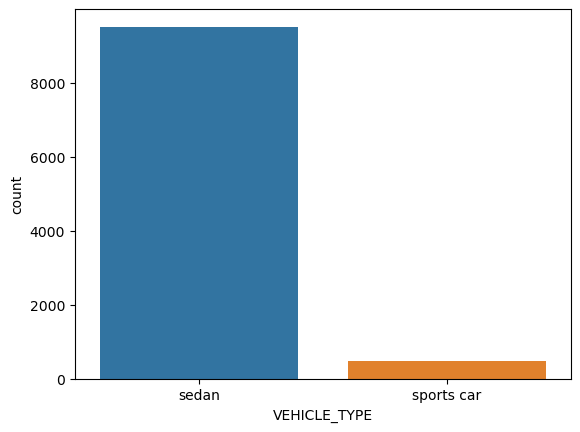

In [16]:
# for loop to print count plots for each categorical column
for col in cat_cols:
    print(col +' count plot \n') 
    sns.countplot(x =col, data =df)
    plt.show()

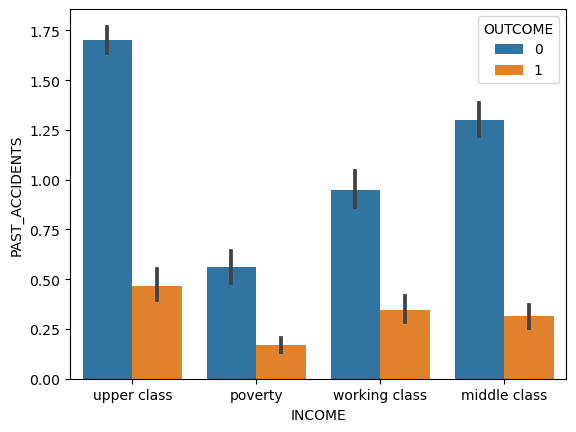

In [17]:
# Using seaborn to plot the group means by income colored by outcome 
ax = sns.barplot(data=df, x="INCOME", y="PAST_ACCIDENTS", hue='OUTCOME')

## Choose a model
knn

In [18]:
# define X and y
X = df.drop(columns=['OUTCOME'])
y = df['OUTCOME']

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Preprocess data

In [20]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')


In [21]:
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')


## Fit and Evaluate a default model

In [22]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)

In [24]:
# Define KNN model pipeline
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()
knn.fit(X_train_proc, y_train)

KNeighborsClassifier()

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      5144
           1       0.79      0.77      0.78      2356

    accuracy                           0.87      7500
   macro avg       0.85      0.84      0.84      7500
weighted avg       0.86      0.87      0.86      7500



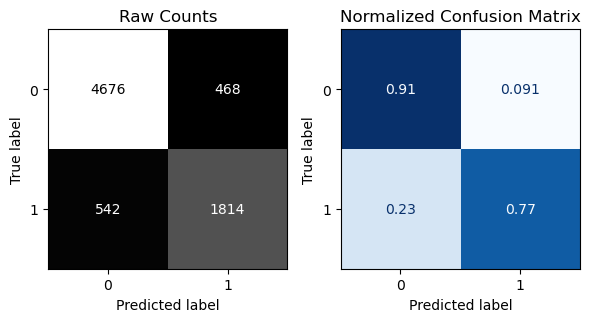


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1723
           1       0.71      0.69      0.70       777

    accuracy                           0.82      2500
   macro avg       0.79      0.78      0.78      2500
weighted avg       0.82      0.82      0.82      2500



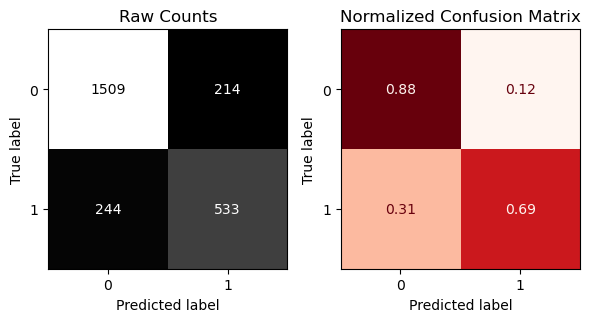

In [28]:
# evaluate
evaluate_classification(knn, X_train_proc, y_train, X_test_proc, y_test)

## Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)

In [29]:
# import package
from sklearn.inspection import permutation_importance

In [36]:
## Calculate feature importances
importances = permutation_importance(knn, X_test_proc, y_test)

## Create a Series of Feature Importances
importances_df = pd.Series(importances['importances_mean'], index=knn.feature_names_in_)

In [47]:
importances_df.sort_values(ascending=False).head(10)

VEHICLE_OWNERSHIP            0.05256
DRIVING_EXPERIENCE_0-9y      0.01456
MARRIED                      0.01432
ANNUAL_MILEAGE               0.01144
POSTAL_CODE                  0.01128
DRIVING_EXPERIENCE_10-19y    0.01024
VEHICLE_YEAR_before 2015     0.00984
VEHICLE_YEAR_after 2015      0.00984
PAST_ACCIDENTS               0.00984
GENDER_female                0.00864
dtype: float64

## Add your observations in a Markdown: Do these features make sense based on the business case?

Most of them do, such as vehicle ownership (presumably, a car owner is more likely to file a claim than a non-car owner), followed by the smallest range of the Driving Experience which also makes sense (i.e. less experienced drivers are more likely to make mistakes resulting in an accident or infraction and therefore more likely to require submitting a claim). Other features such as married or vehicle year would require further investigation. 

## Create Explanatory Visualizations for the most important features.

- Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.
  
    - The purpose is to demonstrate key trends you found that will be of interest to a stakeholder.
      
        - These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

        - These will be added to your readme in part 4

The visualization below shows insight into the relationship between driving experience and filing an insurance claim ('OUTCOME'). By looking at the first range of driving experience (0-9), it's apparent that the highest number of drivers (about 2,200) filing claims this year had less than 10 years of driving experience.

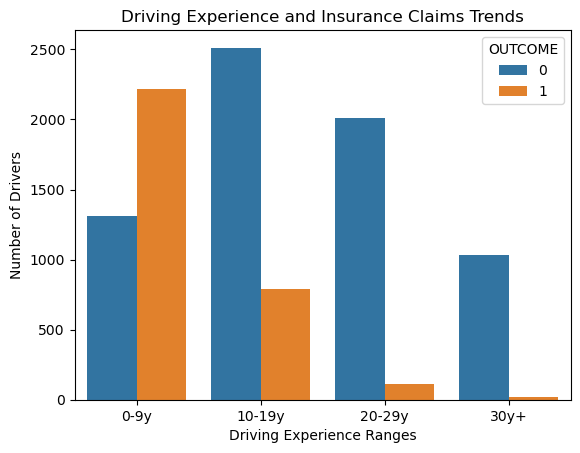

In [111]:
ax =sns.countplot(data=df,x='DRIVING_EXPERIENCE',hue = 'OUTCOME').set(
    title='Driving Experience and Insurance Claims Trends',
    xlabel='Driving Experience Ranges',
    ylabel = 'Number of Drivers');

The visualization below shows insight into the relationship between a driver's marriage (0 = not married, 1 = married) status and filing an insurance claim (0 = not filed, 1 = filed). We can see here that the number of claims filed by unmarried drivers (about 2,000) is about twice as many as those filed by married drivers.

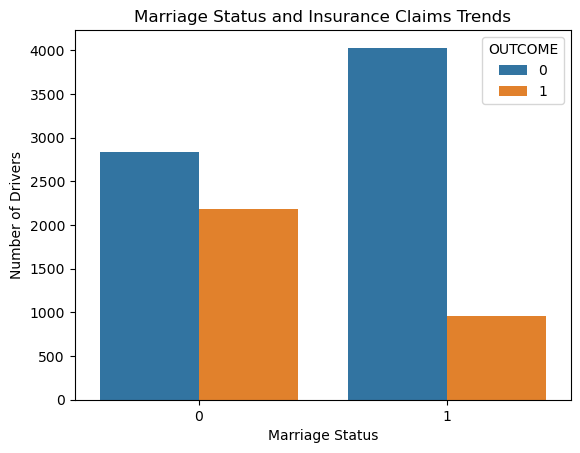

In [110]:
sns.countplot(data=df, x="MARRIED", hue="OUTCOME").set(
    title="Marriage Status and Insurance Claims Trends",
    xlabel="Marriage Status",
    ylabel="Number of Drivers",
);